In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "cyclistic-data"

# Cyclistic Bike-Share case study

## 1. Ask

#### The Cyclistic bike-share company targets to convert as many casual members as possible into annual members. Therefore we will try to gain some insight from the data to identify differences and patterns between annual and casual members.


#### Our primary question is "How do annual members and casual riders use Cyclistic bikes differently?"
#### The key stakeholders are the director of marketing, Lily Moreno, the Cyclistic marketing analytics team and the Cyclistic executive team


## 2. Prepare
#### We have downloaded the data from this source https://divvy-tripdata.s3.amazonaws.com/index.html under this license https://www.divvybikes.com/data-license-agreement. The data is organized in multiple excel files and we will examine datasets from August 2020 to July 2021.

In [2]:
## Loading the required packages
library(tidyverse) ## for import and data wrangling
library(lubridate) ## for date and time data
library(ggplot2) ## for visualizations
library(geosphere) ## for geographical data


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
## Load the data
Aug_2020 <- read.csv("../input/cyclistic-data/Aug_2020/202008-divvy-tripdata.csv")
Sep_2020 <- read.csv("../input/cyclistic-data/Sep_2020/202009-divvy-tripdata.csv")
Oct_2020 <- read.csv("../input/cyclistic-data/Oct_2020/202010-divvy-tripdata.csv")
Nov_2020 <- read.csv("../input/cyclistic-data/Nov_2020/202011-divvy-tripdata.csv")
Dec_2020 <- read.csv("../input/cyclistic-data/Dec_2020/202012-divvy-tripdata.csv")
Jan_2021 <- read.csv("../input/cyclistic-data/Jan_2021/202101-divvy-tripdata.csv")
Feb_2021 <- read.csv("../input/cyclistic-data/Feb_2021/202102-divvy-tripdata.csv")
Mar_2021 <- read.csv("../input/cyclistic-data/March_2021/202103-divvy-tripdata.csv")
Apr_2021 <- read.csv("../input/cyclistic-data/April_2021/202104-divvy-tripdata.csv")
May_2021 <- read.csv("../input/cyclistic-data/May_2021/202105-divvy-tripdata.csv")
Jun_2021 <- read.csv("../input/cyclistic-data/June_2021/202106-divvy-tripdata.csv")
Jul_2021 <- read.csv("../input/cyclistic-data/July_2021/202107-divvy-tripdata.csv")

In [4]:
## We will join all the data together but first we must convert "end_station_id" 
## and "start_station_id" into characters where necessary

Aug_2020$start_station_id <- as.character(Aug_2020$start_station_id)
Aug_2020$end_station_id <- as.character(Aug_2020$end_station_id)

Sep_2020$start_station_id <- as.character(Sep_2020$start_station_id)
Sep_2020$end_station_id <- as.character(Sep_2020$end_station_id)

Oct_2020$start_station_id <- as.character(Oct_2020$start_station_id)
Oct_2020$end_station_id <- as.character(Oct_2020$end_station_id)

Nov_2020$start_station_id <- as.character(Nov_2020$start_station_id)
Nov_2020$end_station_id <- as.character(Nov_2020$end_station_id)

Jul_2021$start_station_id <- as.character(Jul_2021$start_station_id)
Jul_2021$end_station_id <- as.character(Jul_2021$end_station_id)

## Now we combine all datasets together
all_cyclistic_data <- bind_rows(Aug_2020,Sep_2020,Oct_2020,Nov_2020,Dec_2020,Jan_2021,Feb_2021,
                           Mar_2021,Apr_2021,May_2021,Jun_2021,Jul_2021)

# 3. Process
### Now we must clean the data for analysis and add some useful context in our dataset

In [5]:
## First we take a little glimpse on the data
str(all_cyclistic_data)
summary(all_cyclistic_data)


## Then we remove all the NA values
clean_data <- drop_na(all_cyclistic_data)

## After that we add some new columns to our dataset
clean_data$date <- as.Date(clean_data$started_at) 
clean_data$day <- format(as.Date(clean_data$date),'%d')
clean_data$month <- format(as.Date(clean_data$date),'%m')
clean_data$year <- format(as.Date(clean_data$date),'%y')
clean_data$day_of_the_week <- format(as.Date(clean_data$date),'%A')

'data.frame':	4731081 obs. of  13 variables:
 $ ride_id           : chr  "322BD23D287743ED" "2A3AEF1AB9054D8B" "67DC1D133E8B5816" "C79FBBD412E578A7" ...
 $ rideable_type     : chr  "docked_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2020-08-20 18:08:14" "2020-08-27 18:46:04" "2020-08-26 19:44:14" "2020-08-27 12:05:41" ...
 $ ended_at          : chr  "2020-08-20 18:17:51" "2020-08-27 19:54:51" "2020-08-26 21:53:07" "2020-08-27 12:53:45" ...
 $ start_station_name: chr  "Lake Shore Dr & Diversey Pkwy" "Michigan Ave & 14th St" "Columbus Dr & Randolph St" "Daley Center Plaza" ...
 $ start_station_id  : chr  "329" "168" "195" "81" ...
 $ end_station_name  : chr  "Clark St & Lincoln Ave" "Michigan Ave & 14th St" "State St & Randolph St" "State St & Kinzie St" ...
 $ end_station_id    : chr  "141" "168" "44" "47" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.7 ...
 $ end_lat       

   ride_id          rideable_type       started_at          ended_at        
 Length:4731081     Length:4731081     Length:4731081     Length:4731081    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:4731081     Length:4731081     Length:4731081     Length:4731081    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [6]:
## Now we will insert two columns with the rides' times and distances
clean_data <- clean_data %>%
  mutate(ride_length=difftime(ended_at,started_at,units = "mins"))

clean_data <- clean_data %>%
  rowwise()%>%
  mutate(ride_dist=distHaversine(c(start_lng,start_lat),
                                 c(end_lng,end_lat)))

In [7]:
## We filter the dataset and keep only the positive values for time and distance
clean_data <- clean_data %>%
  filter(ride_length>0 & ride_dist>0)
## Now we are ready for the analyze phase

# 4. Analyze
### Perform analysis via calculations and visualizations

In [8]:
## First we want to check the differences in time and distance between the members
clean_data %>%
  group_by(member_casual)%>%
  summarise(average_time=mean(ride_length),average_dist=mean(ride_dist))

member_casual,average_time,average_dist
<chr>,<drtn>,<dbl>
casual,33.49975 mins,2498.512
member,14.38676 mins,2312.494


#### There is a clear understanding that casual members use Cyclistic bikes for longer and cover larger distances in average, compared to annual members.

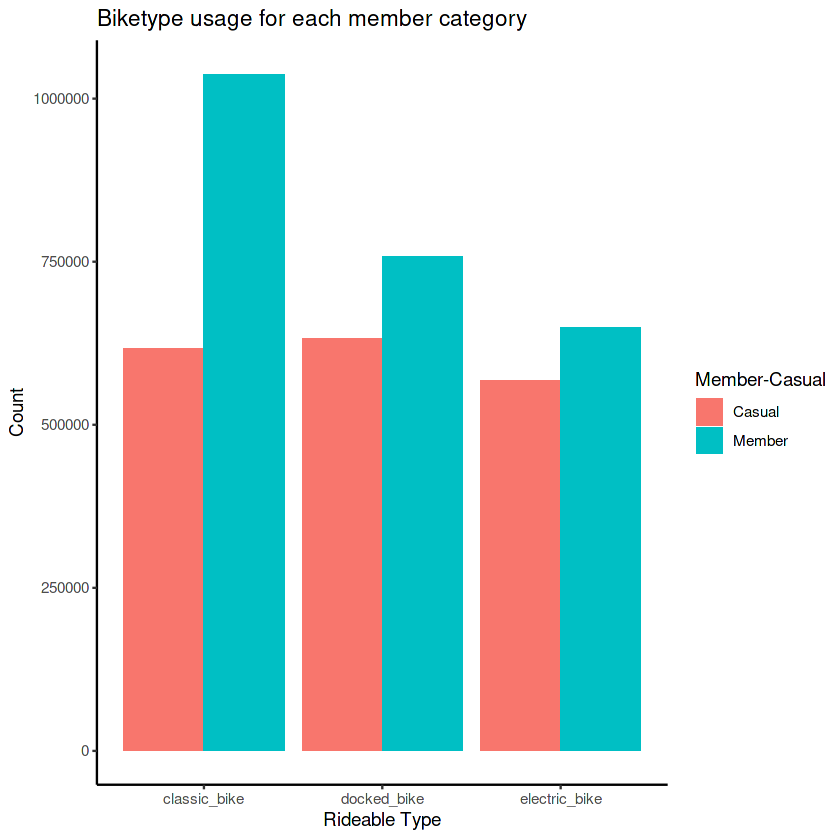

In [9]:
## Identify the type of bike each category uses the most
ggplot(clean_data,aes(x=rideable_type,fill=member_casual)) +
geom_bar(position="dodge") +
labs(title="Biketype usage for each member category",x="Rideable Type",y="Count") +
theme_classic() +
scale_fill_discrete(name="Member-Casual",labels=c("Casual","Member"))

#### It seems that there is no significant preference for a certain type of bike in casual members. However, annual members seem to prefer the classic bike.

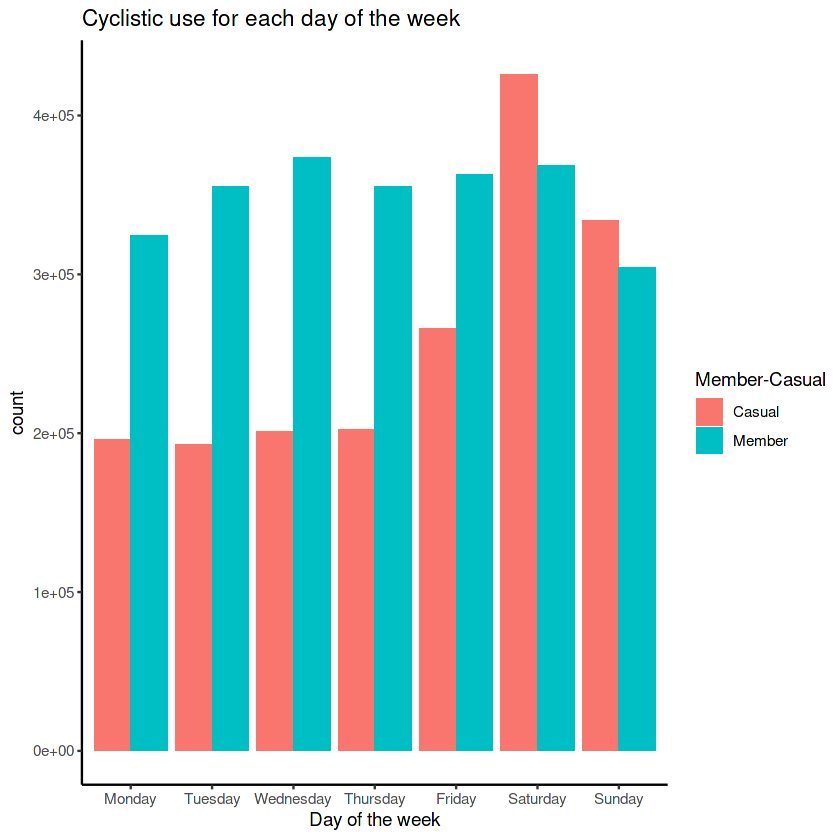

In [10]:
## Identify trends for each day of the week
ggplot(clean_data,aes(x=factor(day_of_the_week,weekdays(min(date) + 2:8)),fill=member_casual))+
geom_bar(position="dodge")+
labs(title="Cyclistic use for each day of the week",
    x="Day of the week",y="count")+
theme_classic()+
scale_fill_discrete(name="Member-Casual",labels=c("Casual","Member"))

#### We can clearly see that casual members tend to use Cyclistic bikes more on the weekend while annual members have almost the same rate of usage every day.

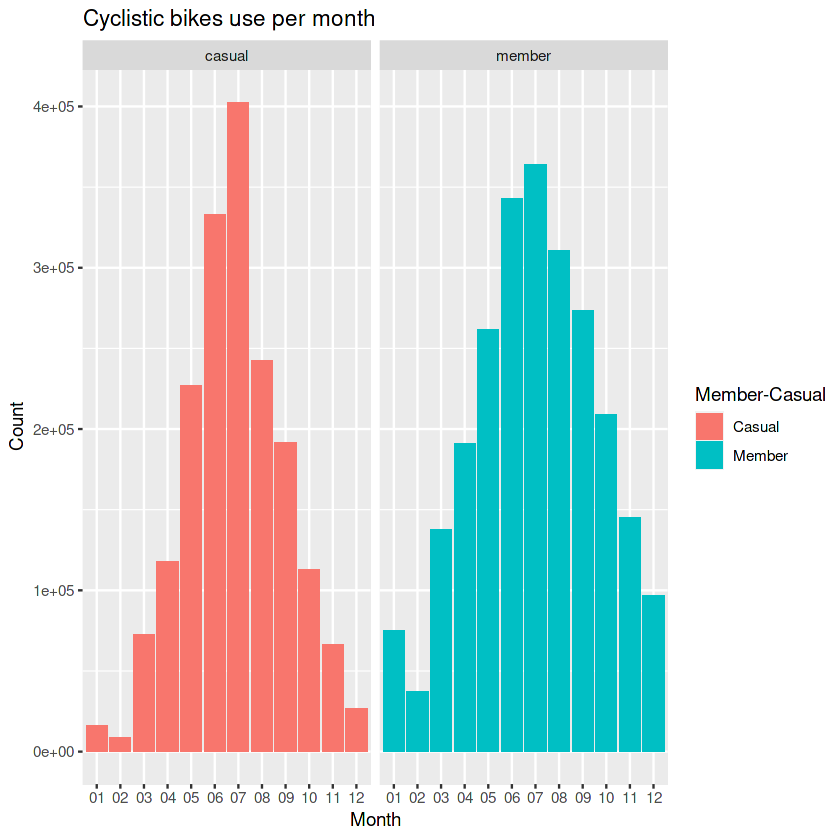

In [11]:
ggplot(clean_data,aes(x=month,fill=member_casual))+
  geom_bar() +
facet_wrap(~member_casual)+
labs(title="Cyclistic bikes use per month",x="Month",y="Count")+
scale_fill_discrete(name="Member-Casual",labels=c("Casual","Member"))


#### It is obvious that both annual and casual members use bikes more often when the weather gets warmer  and reach their peak in July.

# 5. Share

#### From the analysis we made we found the following points
#### 1. Casual riders spend more time when riding bikes and cover larger distances in average than annual riders
#### 2. Annual members have a preference to classic bikes while casual members show no preference
#### 3. Casual members seem to use Cyclistic bikes more often on the weekends when annual members present a steady pace for the whole week
#### 4. Both annual and casual members show a tendency to use bikes when the summer months are close. That is explained by the weather conditions which are significantly better at that time of the year.

# 6. Act

#### Taking in consideration the points 1 and 3 we can conclude that annual members are people who live at the center of Chicago and use bikes to move daily to their work and casual members probably live in the outskirts and prefer bikes in their leisure time on weekends. A good strategy for the company would be to launch a new membership package only for the weekends. 
#### In addition to that, another subscription package could include discounts for long distances in order to attract a lot of casual members who cover large distances. 
#### Finally, Cyclistic could start a campaign and advertise a new project for a 6-month subscription from April to September where the most of the members use bicycle for their transportation.